In [33]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.cm as cm
import pandas as pd
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
#from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
%matplotlib inline

def fill_missing(matrix):
    region_list=matrix.groupby("Region").mean()
    regions=np.asarray(region_list.index)
    for i in range(len(regions)):
        matrix.loc[matrix['Region']==regions[i]]=matrix.loc[matrix['Region']==regions[i]].fillna(matrix.loc[matrix['Region']==regions[i]].mean())
    matrix.iloc[:,2:]=matrix.iloc[:,2:].astype(float)
#     print(matrix.iloc[:,2:])
    return matrix

In [34]:
#For economy data
def fill_rem(matrix):
    region_list=matrix.groupby("Region").mean()
    regions=np.asarray(region_list.index)
    for i in range(len(regions)):
        col_arr=np.asarray(matrix.columns)
        hmean=(matrix[[col_arr[1],col_arr[2],col_arr[3],col_arr[4],col_arr[5],col_arr[6],col_arr[7]]].groupby('Region').mean()).mean(axis=1)
        my_mat=matrix[[col_arr[1],col_arr[2],col_arr[3],col_arr[4],col_arr[5],col_arr[6],col_arr[7]]]
        my_mat=my_mat.loc[my_mat['Region']==regions[i]].fillna(np.asarray(hmean[[regions[i]]])[0])
        matrix.loc[(matrix['Region']==regions[i]),(col_arr[1],col_arr[2],col_arr[3],col_arr[4],col_arr[5],col_arr[6],col_arr[7])]=my_mat
        my_mat=matrix[[col_arr[1],col_arr[8],col_arr[9],col_arr[10],col_arr[11],col_arr[12]]]
        hmean=(matrix[[col_arr[1],col_arr[8],col_arr[9],col_arr[10],col_arr[11],col_arr[12]]].groupby('Region').mean()).mean(axis=1)
        my_mat=my_mat.loc[my_mat['Region']==regions[i]].fillna(np.asarray(hmean[[regions[i]]])[0])
        matrix.loc[(matrix['Region']==regions[i]),(col_arr[1],col_arr[8],col_arr[9],col_arr[10],col_arr[11],col_arr[12])]=my_mat
    return matrix

In [35]:
#for education data
def fill_rem2(matrix):
    region_list=matrix.groupby("Region").mean()
    regions=np.asarray(region_list.index)
    for i in range(len(regions)):
        col_arr=np.asarray(matrix.columns)
        for j in range(0,12):
            my_mat=matrix[[col_arr[1],col_arr[j*3+2],col_arr[j*3+3],col_arr[j*3+4]]]
            hmean=(matrix[[col_arr[1],col_arr[j*3+2],col_arr[j*3+3],col_arr[j*3+4]]].groupby('Region').mean()).mean(axis=1)
            my_mat=my_mat.loc[my_mat['Region']==regions[i]].fillna(np.asarray(hmean[[regions[i]]])[0])
            matrix.loc[(matrix['Region']==regions[i]),(col_arr[1],col_arr[j*3+2],col_arr[j*3+3],col_arr[j*3+4])]=my_mat
    return matrix

In [36]:
#reading all the data
regions= pd.read_csv('regions.csv',dtype='str',delimiter=',')

In [37]:
childsexratio=pd.read_csv('datagov\Demography\child-sex-ratio-0-6-years.csv',delimiter=',')
childsexratio.rename(columns={"Country/ States/ Union Territories Name" : "States and Union Territories"},inplace=True)
childsexratio_regions=regions.merge(childsexratio,how="outer",right_on='States and Union Territories',left_on='States and Union Territories')
childsexratio_regions['Category']=childsexratio_regions['Category'].fillna("State")
childsexratio_regions['Region']=childsexratio_regions['Region'].fillna("Country")
childsexratio_regions=childsexratio_regions.drop('Category',axis=1)
childsexratio_regions=fill_missing(childsexratio_regions)

In [38]:
decgrowthrate=pd.read_csv('datagov\Demography\decadal-growth-rate.csv',delimiter=',')
decgrowthrate.rename(columns={"Country/ States/ Union Territories Name" : "States and Union Territories"},inplace=True)
decgrowthrate_regions=regions.merge(decgrowthrate,how="outer",right_on='States and Union Territories',left_on='States and Union Territories')
decgrowthrate_regions['Category']=decgrowthrate_regions['Category'].fillna("State")
decgrowthrate_regions['Region']=decgrowthrate_regions['Region'].fillna("Country")
decgrowthrate_regions=decgrowthrate_regions.drop('Category',axis=1)
decgrowthrate_regions=fill_missing(decgrowthrate_regions)

In [39]:
sexratio=pd.read_csv('datagov\Demography\sex-ratio.csv',delimiter=',')
sexratio.rename(columns={"Country/ States/ Union Territories Name" : "States and Union Territories"},inplace=True)
sexratio_regions=regions.merge(sexratio,how="outer",right_on='States and Union Territories',left_on='States and Union Territories')
sexratio_regions['Category']=sexratio_regions['Category'].fillna('State')
sexratio_regions['Region']=sexratio_regions['Region'].fillna('Country')
sexratio_regions=sexratio_regions.drop('Category',axis=1)
sexratio_regions=fill_missing(sexratio_regions)

In [40]:
gdpconstprice=pd.read_csv('datagov\Economy\gross-domestic-product-gdp-constant-price.csv',delimiter=',')[:11]
gdpconstprice=gdpconstprice.rename(columns={'All_India GDP':'INDIA', 'Andhra Pradesh ':'Andhra Pradesh','West Bengal1':'West Bengal','Andaman & Nicobar Islands':'A & N Islands','Delhi':'NCT of Delhi'},)
gdpconstprice['Items Description']=gdpconstprice['Items Description'].astype(str)+' '+gdpconstprice['Duration'].astype(str)
gdpconstprice=gdpconstprice.drop('Duration',axis=1).set_index('Items Description').T.reset_index()
gdpconstprice=gdpconstprice.rename(columns={'index':'States and Union Territories'})
gdpconstprice_regions=regions.merge(gdpconstprice,how='outer')
gdpconstprice_regions['Region']=gdpconstprice_regions['Region'].fillna('Country')
gdpconstprice_regions=fill_missing(gdpconstprice_regions)
gdpconstprice_regions=fill_rem(gdpconstprice_regions)

In [41]:
# gdpcurrprice_regions

In [42]:
gdpcurrprice=pd.read_csv('datagov\Economy\gross-domestic-product-gdp-current-price.csv',delimiter=',')
gdpcurrprice=gdpcurrprice.rename(columns={'Items  Description':'Items Description','All_India GDP':'INDIA','Andhra Pradesh ':'Andhra Pradesh','West Bengal1':'West Bengal','Andaman & Nicobar Islands':'A & N Islands','Delhi':'NCT of Delhi'})
gdpcurrprice['Items Description']=gdpcurrprice['Items Description'].astype(str)+' '+gdpcurrprice['Duration'].astype(str)
gdpcurrprice=gdpcurrprice.drop('Duration',axis=1).set_index('Items Description').T.reset_index()
gdpcurrprice=gdpcurrprice.rename(columns={'index':'States and Union Territories'})
gdpcurrprice_regions=regions.merge(gdpcurrprice,how='outer')
gdpcurrprice_regions['Region']=gdpcurrprice_regions['Region'].fillna('Country')
gdpcurrprice_regions=fill_missing(gdpcurrprice_regions)
gdpcurrprice_regions=fill_rem(gdpcurrprice_regions)
# gdpcurrprice_regions

In [43]:
statewisendpconstprice=pd.read_csv('datagov\Economy\state-wise-net-domestic-product-ndp-constant-price.csv',delimiter=',')[:11]
statewisendpconstprice=statewisendpconstprice.rename(columns={'Item Description':'Items Description','All_India NDP':'INDIA','Andhra Pradesh ':'Andhra Pradesh','West Bengal1':'West Bengal','Andaman & Nicobar Islands':'A & N Islands','Delhi':'NCT of Delhi'})
statewisendpconstprice['Items Description']=statewisendpconstprice['Items Description'].astype(str)+' '+statewisendpconstprice['Duration'].astype(str)
statewisendpconstprice=statewisendpconstprice.drop('Duration',axis=1).set_index('Items Description').T.reset_index()
statewisendpconstprice=statewisendpconstprice.rename(columns={'index':'States and Union Territories'})
statewisendpconstprice_regions=regions.merge(statewisendpconstprice,how='outer')
statewisendpconstprice_regions['Region']=statewisendpconstprice_regions['Region'].fillna('Country')
statewisendpconstprice_regions=fill_missing(statewisendpconstprice_regions)
statewisendpconstprice_regions=fill_rem(statewisendpconstprice_regions)

In [44]:
statewisendpcurrprice=pd.read_csv('datagov\Economy\state-wise-net-domestic-product-ndp-current-price.csv',delimiter=',')[:11]
statewisendpcurrprice=statewisendpcurrprice.rename(columns={'Item Description':'Items Description','All_India NDP':'INDIA','Andhra Pradesh ':'Andhra Pradesh','West Bengal1':'West Bengal','Andaman & Nicobar Islands':'A & N Islands','Delhi':'NCT of Delhi'})
statewisendpcurrprice['Items Description']=statewisendpcurrprice['Items Description'].astype(str)+' '+statewisendpcurrprice['Duration'].astype(str)
statewisendpcurrprice=statewisendpcurrprice.drop('Duration',axis=1).set_index('Items Description').T.reset_index()
statewisendpcurrprice=statewisendpcurrprice.rename(columns={'index':'States and Union Territories'})
statewisendpcurrprice_regions=regions.merge(statewisendpcurrprice,how='outer')
statewisendpcurrprice_regions['Region']=statewisendpcurrprice_regions['Region'].fillna('Country')
statewisendpcurrprice_regions=fill_missing(statewisendpcurrprice_regions)
statewisendpcurrprice_regions=fill_rem(statewisendpcurrprice_regions)

In [45]:
dropoutrate=pd.read_csv('datagov\Education\drop-out-rate.csv',delimiter=',')
dropoutrate=dropoutrate.replace({'All India':'INDIA','Arunachal  Pradesh':'Arunachal Pradesh','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Madhya  Pradesh':'Madhya Pradesh','Tamil  Nadu':'Tamil Nadu'})
dropoutrate=dropoutrate.set_index(['State_UT','year']).unstack()
dropoutrate=dropoutrate.T.reset_index()
dropoutrate['level_0']=dropoutrate['level_0'].astype(str)+' '+dropoutrate['year'].astype(str)
dropoutrate=dropoutrate.drop('year',axis=1).set_index('level_0').T.reset_index()
dropoutrate=dropoutrate.rename(columns={'State_UT':'States and Union Territories'})
dropoutrate[dropoutrate.columns[1:]]=dropoutrate[dropoutrate.columns[1:]].apply(pd.to_numeric,errors='coerce')
dropoutrate_regions=regions.merge(dropoutrate,how='outer')
dropoutrate_regions['Region']=dropoutrate_regions['Region'].fillna('Country')
dropoutrate_regions=fill_missing(dropoutrate_regions)
dropoutrate_regions=fill_rem2(dropoutrate_regions)
# dropoutrate_regions

In [46]:
enorlhighedu=pd.read_csv('datagov\Education\gross-enrolment-ratio-higher-education.csv',delimiter=',')
enorlhighedu=enorlhighedu.replace({'Andaman & Nicobar Islands':'A & N Islands','All India':'INDIA','Chhatisgarh':'Chhattisgarh','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu and Kashmir':'Jammu & Kashmir','Uttrakhand':'Uttarakhand'})
enorlhighedu=enorlhighedu.set_index(['Country/ State/ UT Name','Year']).unstack()
enorlhighedu=enorlhighedu.T.reset_index()
enorlhighedu['level_0']=enorlhighedu['level_0'].astype(str)+' '+enorlhighedu['Year'].astype(str)
enorlhighedu=enorlhighedu.drop('Year',axis=1).set_index('level_0').T.reset_index()
enorlhighedu=enorlhighedu.rename(columns={'Country/ State/ UT Name':'States and Union Territories'})
enorlhighedu[enorlhighedu.columns[1:]]=enorlhighedu[enorlhighedu.columns[1:]].apply(pd.to_numeric,errors='coerce')
enorlhighedu_regions=regions.merge(enorlhighedu,how='outer')
enorlhighedu_regions['Region']=enorlhighedu_regions['Region'].fillna('Country')
enorlhighedu_regions=fill_missing(enorlhighedu_regions)

In [47]:
enrolschools=pd.read_csv('datagov\Education\gross-enrolment-ratio-schools.csv',delimiter=',')
enrolschools=enrolschools.replace({'Andaman & Nicobar Islands':'A & N Islands','All India':'INDIA','Pondicherry':'Puducherry','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir','Uttaranchal':'Uttarakhand','MADHYA PRADESH':'Madhya Pradesh'})
enrolschools=enrolschools.set_index(['State_UT','Year']).unstack()
enrolschools=enrolschools.T.reset_index()
enrolschools['level_0']=enrolschools['level_0'].astype(str)+' '+enrolschools['Year'].astype(str)
enrolschools=enrolschools.drop('Year',axis=1).set_index('level_0').T.reset_index()
enrolschools=enrolschools.rename(columns={'State_UT':'States and Union Territories'})
enrolschools[enrolschools.columns[1:]]=enrolschools[enrolschools.columns[1:]].apply(pd.to_numeric,errors='coerce')
enrolschools_regions=regions.merge(enrolschools,how='outer')
enrolschools_regions['Region']=enrolschools_regions['Region'].fillna('Country')
enrolschools_regions=fill_missing(enrolschools_regions)

In [48]:
litracyrate7=pd.read_csv('datagov\Education\literacy-rate-7-years.csv',delimiter=',')
litracyrate7=litracyrate7.rename(columns={'Country/ States/ Union Territories Name':'States and Union Territories'})
litracyrate7_regions=regions.merge(litracyrate7,how='outer')
litracyrate7_regions['Category']=litracyrate7_regions['Category'].fillna("State")
litracyrate7_regions['Region']=litracyrate7_regions['Region'].fillna('Country')
litracyrate7_regions=litracyrate7_regions.drop('Category',axis=1)
litracyrate7_regions=fill_missing(litracyrate7_regions)
# litracyrate7_regions.iloc[:,1]

In [49]:
schoolsboystoilet=pd.read_csv('datagov\Education\percentage-schools-boys-toilet.csv',delimiter=',')
schoolsboystoilet=schoolsboystoilet.replace({'All India':'INDIA','Andaman & Nicobar Islands':'A & N Islands','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir'})
schoolsboystoilet= schoolsboystoilet.set_index(['State_UT','year']).unstack()
schoolsboystoilet=schoolsboystoilet.T.reset_index()
schoolsboystoilet['level_0']=schoolsboystoilet['level_0'].astype(str)+' '+schoolsboystoilet['year'].astype(str)
schoolsboystoilet=schoolsboystoilet.drop('year',axis=1).set_index('level_0').T.reset_index()
schoolsboystoilet=schoolsboystoilet.rename(columns={'State_UT':'States and Union Territories'})
schoolsboystoilet_regions=regions.merge(schoolsboystoilet,how='outer')
schoolsboystoilet_regions['Region']=schoolsboystoilet_regions['Region'].fillna('Country')
schoolsboystoilet_regions=fill_missing(schoolsboystoilet_regions)

In [50]:
schoolscomp=pd.read_csv('datagov\Education\percentage-schools-computers.csv',delimiter=',')
schoolscomp=schoolscomp.replace({'All India':'INDIA','Andaman & Nicobar Islands':'A & N Islands','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir'})
schoolscomp=schoolscomp.set_index(['State_UT','year']).unstack()
schoolscomp=schoolscomp.T.reset_index()
schoolscomp['level_0']=schoolscomp['level_0'].astype(str)+' '+schoolscomp['year'].astype(str)
schoolscomp=schoolscomp.drop('year',axis=1).set_index('level_0').T.reset_index()
schoolscomp=schoolscomp.rename(columns={'State_UT':'States and Union Territories'})
schoolscomp_regions=regions.merge(schoolscomp,how='outer')
schoolscomp_regions['Region']=schoolscomp_regions['Region'].fillna('Country')
schoolscomp_regions=fill_missing(schoolscomp_regions)

In [51]:
schoolswater=pd.read_csv('datagov\Education\percentage-schools-drinking-water.csv',delimiter=',')
schoolswater=schoolswater.replace({'All India':'INDIA','Andaman & Nicobar Islands':'A & N Islands','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir'})
schoolswater=schoolswater.set_index(['State/UT','Year']).unstack()
schoolswater=schoolswater.T.reset_index()
schoolswater['level_0']=schoolswater['level_0'].astype(str)+' '+schoolswater['Year'].astype(str)
schoolswater=schoolswater.drop('Year',axis=1).set_index('level_0').T.reset_index()
schoolswater=schoolswater.rename(columns={'State/UT':'States and Union Territories'})
schoolswater_regions=regions.merge(schoolswater,how='outer')
schoolswater_regions['Region']=schoolswater_regions['Region'].fillna('Country')
schoolswater_regions=fill_missing(schoolswater_regions)

In [52]:
schoolselectricity=pd.read_csv('datagov\Education\percentage-schools-electricity.csv',delimiter=',')
schoolselectricity=schoolselectricity.replace({'All India':'INDIA','Andaman & Nicobar Islands':'A & N Islands','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir'})
schoolselectricity=schoolselectricity.set_index(['State_UT','year']).unstack()
schoolselectricity=schoolselectricity.T.reset_index()
schoolselectricity['level_0']=schoolselectricity['level_0'].astype(str)+' '+schoolselectricity['year'].astype(str)
schoolselectricity=schoolselectricity.drop('year',axis=1).set_index('level_0').T.reset_index()
schoolselectricity=schoolselectricity.rename(columns={'State_UT':'States and Union Territories'})
schoolselectricity_regions=regions.merge(schoolselectricity,how='outer')
schoolselectricity_regions['Region']=schoolselectricity_regions['Region'].fillna('Country')
schoolselectricity_regions=fill_missing(schoolselectricity_regions)

In [53]:
schoolsgirlstoilet=pd.read_csv('datagov\Education\percentage-schools-girls-toilet.csv',delimiter=',')
schoolsgirlstoilet=schoolsgirlstoilet.replace({'All India':'INDIA','Andaman & Nicobar Islands':'A & N Islands','Dadra & Nagar Haveli':'D & N Haveli','Delhi':'NCT of Delhi','Jammu And Kashmir':'Jammu & Kashmir'})
schoolsgirlstoilet=schoolsgirlstoilet.set_index(['State_UT','year']).unstack()
schoolsgirlstoilet=schoolsgirlstoilet.T.reset_index()
schoolsgirlstoilet['level_0']=schoolsgirlstoilet['level_0'].astype(str)+' '+schoolsgirlstoilet['year'].astype(str)
schoolsgirlstoilet=schoolsgirlstoilet.drop('year',axis=1).set_index('level_0').T.reset_index()
schoolsgirlstoilet=schoolsgirlstoilet.rename(columns={'State_UT':'States and Union Territories'})
schoolsgirlstoilet_regions=regions.merge(schoolsgirlstoilet,how='outer')
schoolsgirlstoilet_regions['Region']=schoolsgirlstoilet_regions['Region'].fillna('Country')
schoolsgirlstoilet_regions=fill_missing(schoolsgirlstoilet_regions)

In [54]:
demography=childsexratio_regions.merge(decgrowthrate_regions.merge(sexratio_regions,how='outer'),how='outer')
demography.shape

(37, 20)

In [55]:
economy=gdpconstprice_regions.merge(gdpcurrprice_regions.merge(statewisendpcurrprice_regions.merge(statewisendpconstprice_regions,how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region'])
economy.shape

(37, 46)

In [56]:
education=dropoutrate_regions.merge(enorlhighedu_regions.merge(enrolschools_regions.merge(litracyrate7_regions.merge(schoolsboystoilet_regions.merge(schoolscomp_regions.merge(schoolswater_regions.merge(schoolselectricity_regions.merge(schoolsgirlstoilet_regions,how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region'])
education.shape

(37, 299)

In [57]:
datagov=demography.merge(economy.merge(education,how='outer',on=['States and Union Territories','Region']),how='outer',on=['States and Union Territories','Region'])
datagov.shape

(37, 361)

Question 2

In [58]:
que2=datagov.values
fordist=que2[0:36,3:362]
fordist2=fordist[0:35,:]-que2[36,3:362]
fordist2=fordist2**2
dist_sum=fordist2.sum(axis=1)**(1/2)

In [59]:
que2_res=dist_sum.argsort()[0:5]
# que2_res

In [60]:
datagov.iloc[que2_res]['States and Union Territories']

14      Maharashtra
23       Tamil Nadu
26    Uttar Pradesh
6           Gujarat
11        Karnataka
Name: States and Union Territories, dtype: object

In [61]:
fordist=que2[0:37,3:362]
# print(fordist.shape)
fordist=(fordist[:,0:358]-fordist[:,0:358].mean(axis=0))/np.sqrt(fordist[:,0:358].var(axis=0).astype(float))
fordist2=fordist[0:35,0:358]-fordist[36,0:358]
fordist2=fordist2**2
dist_sum=np.sqrt(fordist2.sum(axis=1).astype(int))

In [62]:
que2_res=dist_sum.argsort()[0:5]

In [63]:
datagov.iloc[que2_res]['States and Union Territories']

14      Maharashtra
11        Karnataka
21        Rajasthan
6           Gujarat
26    Uttar Pradesh
Name: States and Union Territories, dtype: object

Question 3:

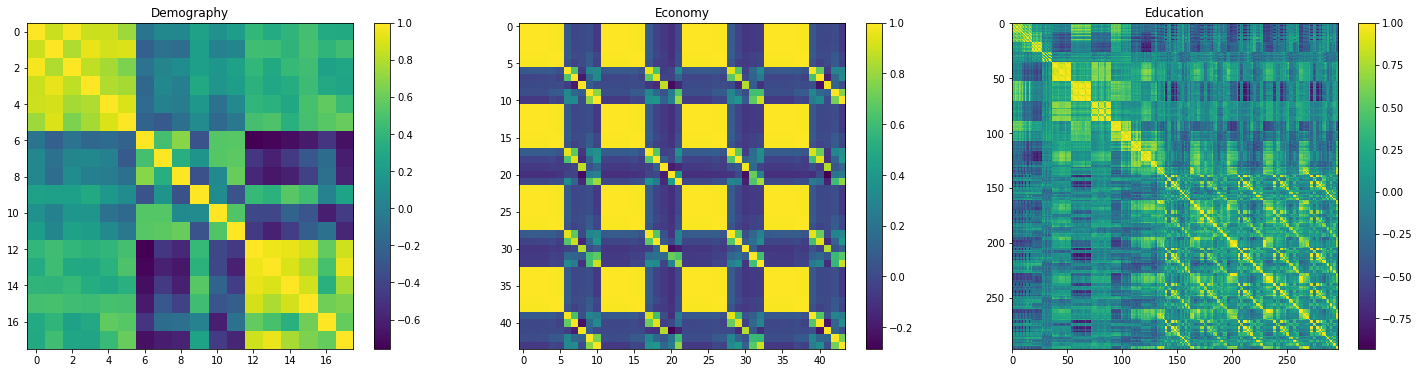

In [64]:
fig=mplot.figure(num=1,figsize=(25,6))
mplot.subplot(1,3,1)
mplot.imshow(demography.corr())
mplot.colorbar()
mplot.title("Demography")
mplot.subplot(1,3,2)
mplot.imshow(economy.corr())
mplot.colorbar()
mplot.title("Economy")
mplot.subplot(1,3,3)
mplot.imshow(education.corr())
mplot.colorbar()
mplot.title("Education")
mplot.show()

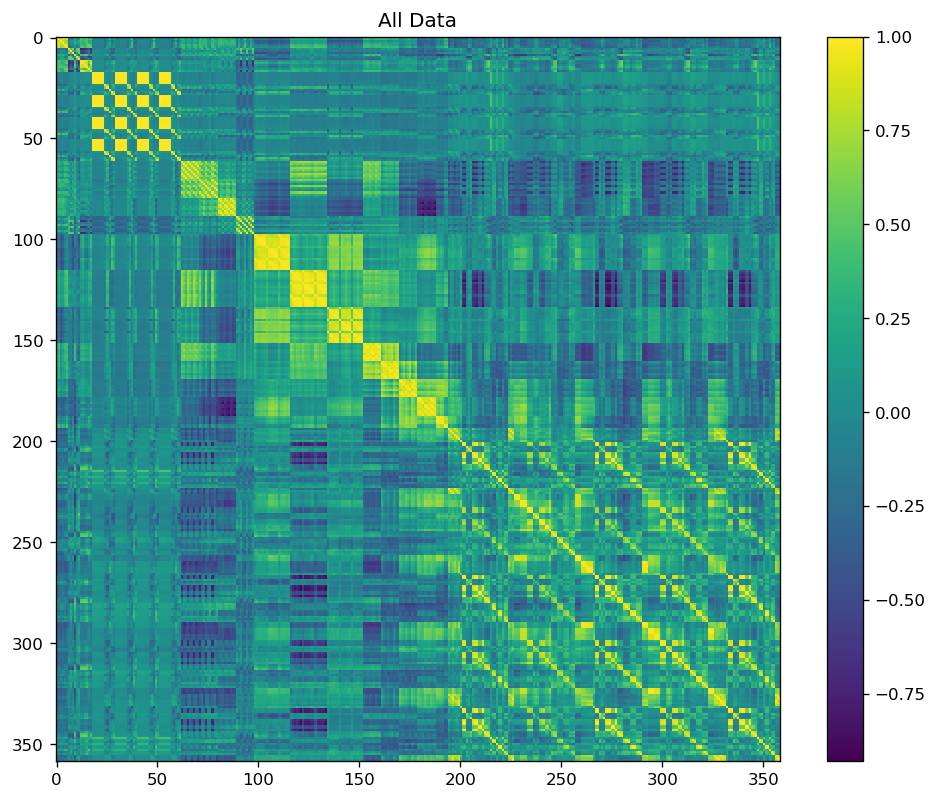

In [65]:
fig=mplot.figure(num=2,figsize=(10,8),dpi=120)
mplot.imshow(datagov.corr())
mplot.colorbar()
mplot.title("All Data")
mplot.show()

Question 4:

In [66]:
def relief_algo(matrix):
    r1,c1=matrix.shape
    all_mat=(matrix.values)[:,1:c1]
    max_col=np.amax(all_mat[:,1:],axis=0)
    min_col=np.amin(all_mat[:,1:],axis=0)
    all_mat[:,1:]=(all_mat[:,1:]-min_col)/(max_col-min_col)
    cp_all_mat=all_mat
    r2,c2=cp_all_mat.shape
    feature_score=np.zeros(c2-1)
    for i in range(0,2000):
        n=np.random.randint(r2-1)
        near_hit=cp_all_mat[cp_all_mat[:,0]==cp_all_mat[n,0],1:]-cp_all_mat[n,1:]
        near_hit=near_hit**2
        near_miss=cp_all_mat[cp_all_mat[:,0]!=cp_all_mat[n,0],1:]-cp_all_mat[n,1:]
        near_miss=near_miss**2
        hit_idx=(near_hit.sum(axis=1)).argsort()[0:2]
        miss_idx=(near_miss.sum(axis=1)).argsort()[0:1]
        feature_score=feature_score-near_hit[hit_idx[1],:]+near_miss[miss_idx[0],:]
    least_score_idx=feature_score.argsort()[::-1][0:2]
    return least_score_idx+2

In [472]:
demo_feat=relief_algo(demography)
# print(demo_feat)
print((demography.columns.values)[demo_feat[0]],' ',(demography.columns.values)[demo_feat[1]])

Decadal growth rate - Total - 2001-11   Decadal growth rate - Rural - 2001-11


In [473]:
eco_feat=relief_algo(economy)
# print(eco_feat)
print((economy.columns.values)[eco_feat[0]],' ',(economy.columns.values)[eco_feat[1]])


(% Growth over previous year) 2016-17_y   (% Growth over previous year) 2016-17_x


In [489]:
edu_feat=relief_algo(education)
# print(edu_feat)
print((education.columns.values)[edu_feat[0]],' ',(education.columns.values)[edu_feat[1]])

SC - Total 2010-11   SC - Male 2010-11


In [475]:
gov_feat=relief_algo(datagov)
# print(gov_feat)
print((datagov.columns.values)[gov_feat[0]],' ',(datagov.columns.values)[gov_feat[1]])


(% Growth over previous year) 2016-17_y   (% Growth over previous year) 2016-17_x


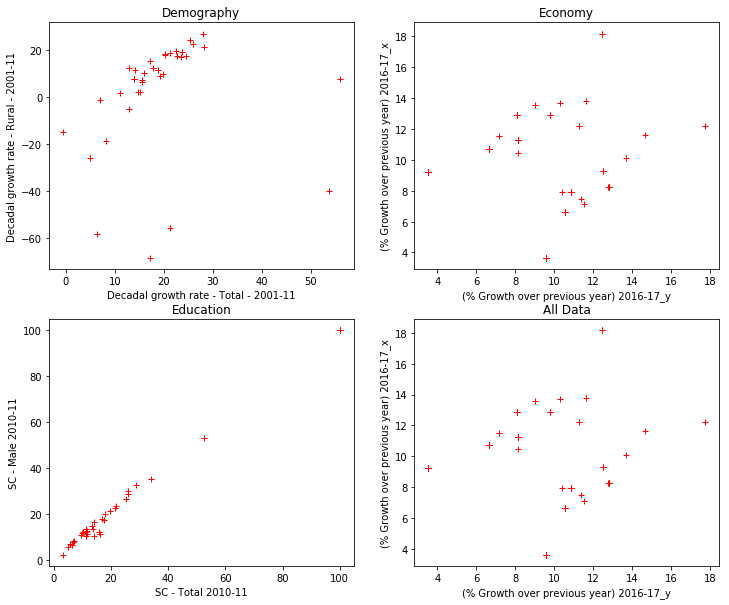

In [507]:
fig=mplot.figure(num=3,figsize=(12,10))
mplot.subplot(2,2,1)
mplot.plot(demography[(demography.columns.values)[demo_feat[0]]].values,demography[(demography.columns.values)[demo_feat[1]]].values,'r+')
mplot.title("Demography")
mplot.xlabel((demography.columns.values)[demo_feat[0]])
mplot.ylabel((demography.columns.values)[demo_feat[1]])
mplot.subplot(2,2,2)
mplot.plot(economy[(economy.columns.values)[eco_feat[0]]].values,economy[(economy.columns.values)[eco_feat[1]]].values,'r+')
mplot.title("Economy")
mplot.xlabel((economy.columns.values)[eco_feat[0]])
mplot.ylabel((economy.columns.values)[eco_feat[1]])
mplot.subplot(2,2,3)
mplot.plot(education[(education.columns.values)[edu_feat[0]]].values,education[(education.columns.values)[edu_feat[1]]].values,'r+')
mplot.title("Education")
mplot.xlabel((education.columns.values)[edu_feat[0]])
mplot.ylabel((education.columns.values)[edu_feat[1]])
mplot.subplot(2,2,4)
mplot.plot(datagov[(datagov.columns.values)[gov_feat[0]]].values,datagov[(datagov.columns.values)[gov_feat[1]]].values,'r+')
mplot.title("All Data")
mplot.xlabel((datagov.columns.values)[gov_feat[0]])
mplot.ylabel((datagov.columns.values)[gov_feat[1]])
mplot.show()

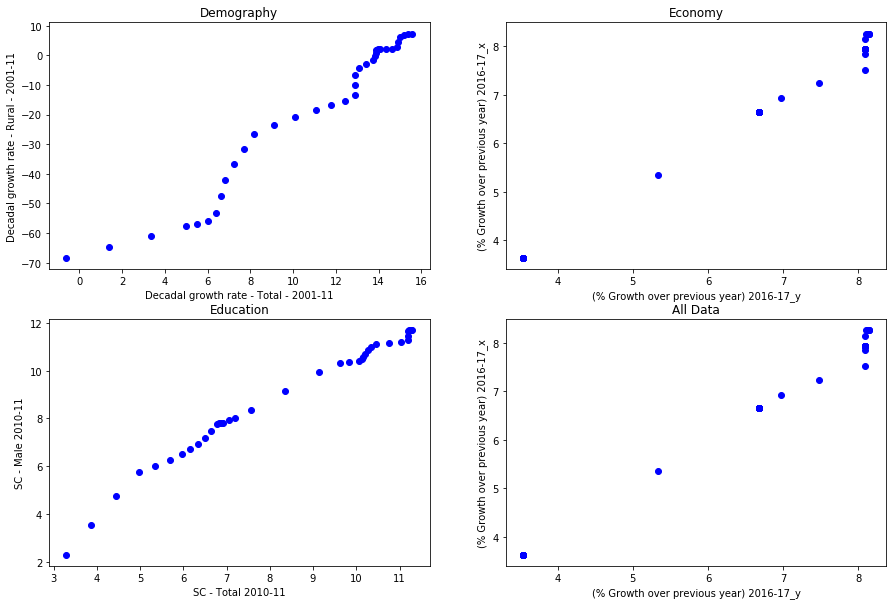

In [508]:
fig=mplot.figure(num=4,figsize=(15,10))
idxd1=demography[(demography.columns.values)[demo_feat[0]]].values
idxd2=demography[(demography.columns.values)[demo_feat[1]]].values
idxe1=economy[(economy.columns.values)[eco_feat[0]]].values
idxe2=economy[(economy.columns.values)[eco_feat[1]]].values
idxed1=education[(education.columns.values)[edu_feat[0]]].values
idxed2=education[(education.columns.values)[edu_feat[1]]].values
idxg1=datagov[(datagov.columns.values)[gov_feat[0]]].values
idxg2=datagov[(datagov.columns.values)[gov_feat[1]]].values
for i in range(len(idxd1)):
    mplot.subplot(2,2,1)
    mplot.plot(np.percentile(idxd1,i),np.percentile(idxd2,i),'bo')
    mplot.title("Demography")
    mplot.xlabel((demography.columns.values)[demo_feat[0]])
    mplot.ylabel((demography.columns.values)[demo_feat[1]])
    mplot.subplot(2,2,2)
    mplot.plot(np.percentile(idxe1,i),np.percentile(idxe2,i),'bo')
    mplot.title("Economy")
    mplot.xlabel((economy.columns.values)[eco_feat[0]])
    mplot.ylabel((economy.columns.values)[eco_feat[1]])
    mplot.subplot(2,2,3)
    mplot.plot(np.percentile(idxed1,i),np.percentile(idxed2,i),'bo')
    mplot.title("Education")
    mplot.xlabel((education.columns.values)[edu_feat[0]])
    mplot.ylabel((education.columns.values)[edu_feat[1]])
    mplot.subplot(2,2,4)
    mplot.plot(np.percentile(idxg1,i),np.percentile(idxg2,i),'bo')
    mplot.title("All Data")
    mplot.xlabel((datagov.columns.values)[gov_feat[0]])
    mplot.ylabel((datagov.columns.values)[gov_feat[1]])
mplot.show()

In [492]:
def get_parts(array,lvl=0):
    maxm=array.max()
    minm=array.min()
#     print(minm,maxm)
    temp=array.copy()
    t_min=temp[temp.argsort()[ceil(len(array)*0.05).astype(int)]]
    t_max=temp[temp.argsort()[len(temp)-ceil(len(array)*0.05).astype(int)-1]]
#     print(t_min,t_max)
    amax=max(abs(t_max),abs(t_min))
    deg=0
    while(amax>10):
        deg=deg+1
        amax=amax/10
    scale=10**deg
    if maxm-minm<scale:
        scale=scale/(10**lvl)
#     print(scale)
    r_min=scale*floor(t_min/scale)
    r_max=scale*ceil(t_max/scale)
#     print(r_min,r_max)
    if r_min!=r_max:
        part_type=((r_max-r_min)/scale).astype(int)
        if part_type in [3,6,7,9]:
            range_len=3
        elif part_type in [2,4,8]:
            range_len=4
        else:
            range_len=5
        range_vec=np.zeros(range_len+1)
        for i in range(len(range_vec)):
            range_vec[i]=r_min+i*(r_max-r_min)/range_len
        fact=scale
        range_vec[0]=floor(minm.astype(float)/fact)*(fact)
        range_vec[len(range_vec)-1]=ceil((maxm.astype(float))/(fact))*(fact)
    else:
        range_vec=np.zeros(2)
        fact=scale
        range_vec[0]=floor(minm.astype(float)/fact)*(fact)
        range_vec[1]=ceil((maxm.astype(float))/(fact))*(fact)
    return range_vec

In [493]:
def intuitive_partitioning(array):
    range_vec=get_parts(array.values)
    print('Level 1 : ')
    print(range_vec)
    temp=array.values.copy()
    parts=[]
    temp.sort()
    print('Level 2 : ')
    for i in range(len(range_vec)-1):
        parts.append(temp[(temp<range_vec[i+1]) & (temp>=range_vec[i])])
    final_parts=[]
#     print(parts)
    for i in range(len(range_vec)-1):
#         print(parts[i])
        if len(parts[i])>1:
            final_parts.append(get_parts(parts[i],1))
        else:
            t_arr=np.zeros(2)
            t_arr[0]=range_vec[i]
            t_arr[1]=range_vec[i+1]
            final_parts.append(t_arr)
        print(final_parts[i])
    return array

In [494]:
pd.options.mode.chained_assignment = None
demo_intuitive=demography.iloc[:,[0,1,demo_feat[0],demo_feat[1]]]
print('Partition set for ',(demography.columns.values)[demo_feat[0]])
demo_intuitive.iloc[:,2]=intuitive_partitioning(demo_intuitive.iloc[:,2])

Partition set for  Decadal growth rate - Total - 2001-11
Level 1 : 
[-10.  10.  20.  60.]
Level 2 : 
[-1.  5.  6.  9.]
[11. 14. 16. 18. 20.]
[20. 30. 40. 50. 60.]


In [495]:
print('Partition set for ',(demography.columns.values)[demo_feat[1]])
demo_intuitive.iloc[:,3]=intuitive_partitioning(demo_intuitive.iloc[:,3])

Partition set for  Decadal growth rate - Rural - 2001-11
Level 1 : 
[-70. -30.   0.  30.]
Level 2 : 
[-70. -58. -56. -54. -52. -40.]
[-30. -15. -10.  -5.  -0.]
[ 0. 10. 20. 30.]


In [496]:
eco_intuitive=economy.iloc[:,[0,1,eco_feat[0],eco_feat[1]]]
print('Partition set for ',(economy.columns.values)[eco_feat[0]])
eco_intuitive.iloc[:,2]=intuitive_partitioning(eco_intuitive.iloc[:,2])

Partition set for  (% Growth over previous year) 2016-17_y
Level 1 : 
[ 0.  5. 10. 15. 20.]
Level 2 : 
[3.5  3.52 3.54 3.56 3.58 3.6 ]
[ 6.  7.  8.  9. 10.]
[10.  11.5 12.  12.5 13. ]
[15. 20.]


In [497]:
print('Partition set for ',(economy.columns.values)[eco_feat[1]])
eco_intuitive.iloc[:,3]=intuitive_partitioning(eco_intuitive.iloc[:,3])

Partition set for  (% Growth over previous year) 2016-17_x
Level 1 : 
[ 0.  5. 10. 15. 20.]
Level 2 : 
[3.6  3.62 3.64 3.66 3.68 3.7 ]
[ 6.  7.  8. 10.]
[10.  11.5 12.  12.5 13. ]
[15. 20.]


In [498]:
edu_intuitive=education.iloc[:,[0,1,edu_feat[0],edu_feat[1]]]
print('Partition set for ',(education.columns.values)[edu_feat[0]])
edu_intuitive.iloc[:,2]=intuitive_partitioning(edu_intuitive.iloc[:,2])

Partition set for  SC - Total 2010-11
Level 1 : 
[  0.  20.  40.  60.  80. 100.]
Level 2 : 
[ 0.  5. 10. 15. 20.]
[20. 22. 24. 26. 28. 40.]
[40. 60.]
[60. 80.]
[ 80. 100.]


In [499]:
print('Partition set for ',(education.columns.values)[edu_feat[1]])
edu_intuitive.iloc[:,3]=intuitive_partitioning(edu_intuitive.iloc[:,3])

Partition set for  SC - Male 2010-11
Level 1 : 
[  0.  20.  40.  60.  80. 100.]
Level 2 : 
[ 0.  5. 10. 15. 20.]
[20. 25. 30. 35. 40.]
[40. 60.]
[60. 80.]
[ 80. 100.]


In [500]:
gov_intuitive=datagov.iloc[:,[0,1,gov_feat[0],gov_feat[1]]]
print('Partition set for ',(datagov.columns.values)[gov_feat[0]])
gov_intuitive.iloc[:,2]=intuitive_partitioning(gov_intuitive.iloc[:,2])

Partition set for  (% Growth over previous year) 2016-17_y
Level 1 : 
[ 0.  5. 10. 15. 20.]
Level 2 : 
[3.5  3.52 3.54 3.56 3.58 3.6 ]
[ 6.  7.  8.  9. 10.]
[10.  11.5 12.  12.5 13. ]
[15. 20.]


In [501]:
print('Partition set for ',(datagov.columns.values)[gov_feat[1]])
gov_intuitive.iloc[:,3]=intuitive_partitioning(gov_intuitive.iloc[:,3])

Partition set for  (% Growth over previous year) 2016-17_x
Level 1 : 
[ 0.  5. 10. 15. 20.]
Level 2 : 
[3.6  3.62 3.64 3.66 3.68 3.7 ]
[ 6.  7.  8. 10.]
[10.  11.5 12.  12.5 13. ]
[15. 20.]
